In [6]:
import tqdm
import pandas as pd
from collections import Counter
from itertools import cycle
import graphviz
from sklearn import datasets, metrics, tree
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tqdm

from sklearn.preprocessing import LabelEncoder

def draw_tree(name, data, features, class_names):
  dot_data = tree.export_graphviz(data, out_file=None) 
  graph = graphviz.Source(dot_data)
  graph.render(name)
  dot_data = tree.export_graphviz(data, out_file=None, 
                      feature_names=features,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
  graph = graphviz.Source(dot_data)  
  return graph

In [7]:
columns = [
 "target", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat", ]

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushroom_df = pd.read_csv(url, header=None, names=columns)
mushroom_df.dropna(axis='columns')
for i in mushroom_df.columns:
  mushroom_df[i] = pd.Categorical(mushroom_df[i]).codes
X_mushroom_train, X_mushroom_test = train_test_split(mushroom_df, test_size=0.3333)
Y_mushroom_train, Y_mushroom_test = X_mushroom_train['target'], X_mushroom_test['target']
X_mushroom_test = X_mushroom_test.drop('target', axis = 1)
X_mushroom_train = X_mushroom_train.drop('target', axis = 1)

In [8]:
mushroom_tree_gini = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=10)
mushroom_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
mushroom_tree_gini.fit(X_mushroom_train, Y_mushroom_train)
mushroom_tree_entropy.fit(X_mushroom_train, Y_mushroom_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

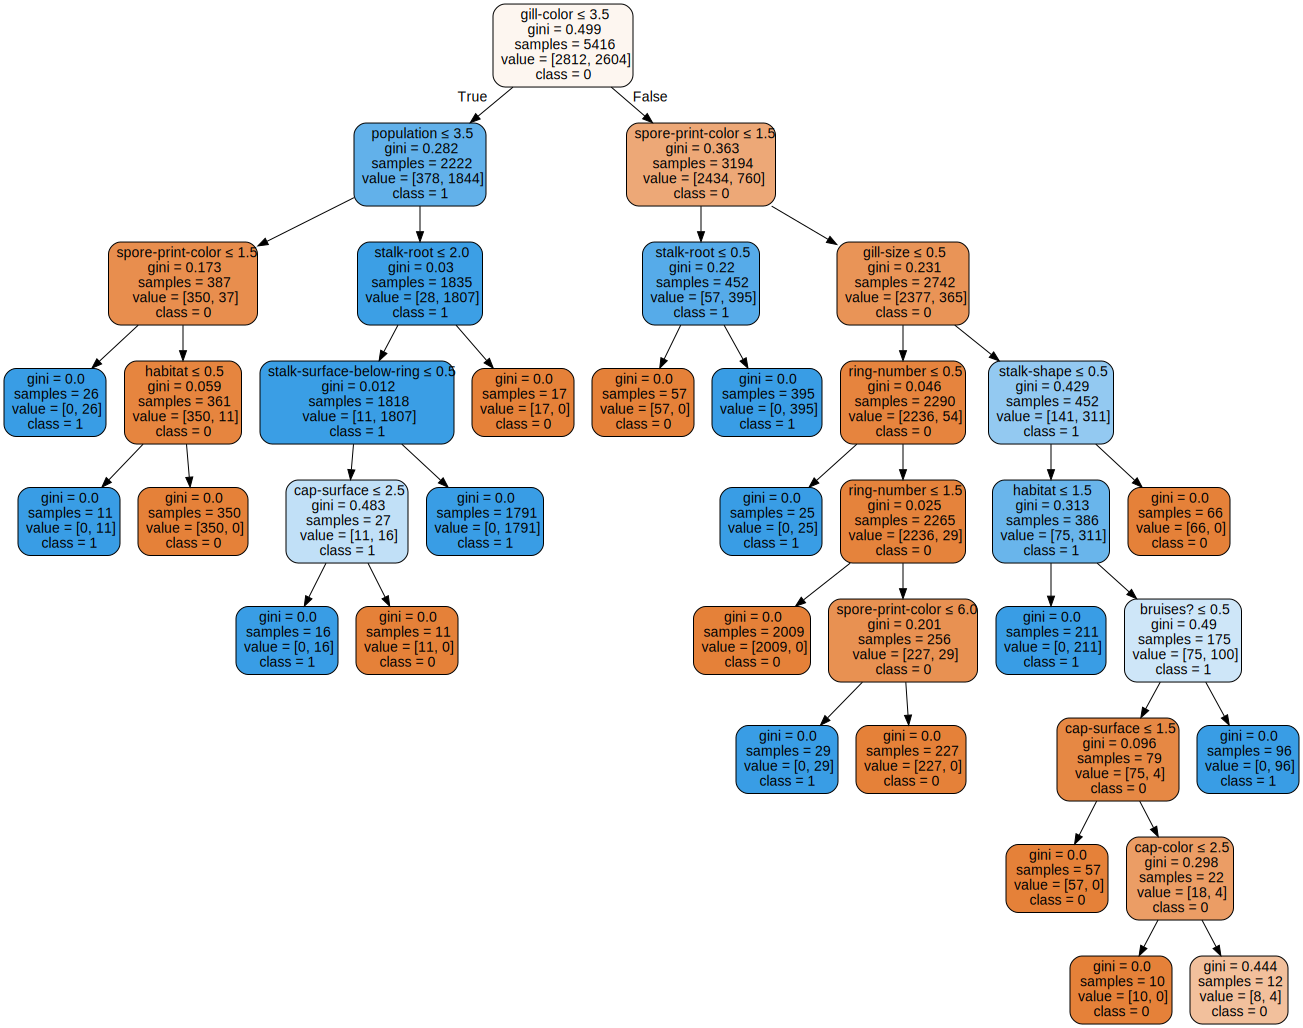

In [10]:
draw_tree("Mushroom gini", mushroom_tree_gini, mushroom_df.columns[1:], ['0', '1'])

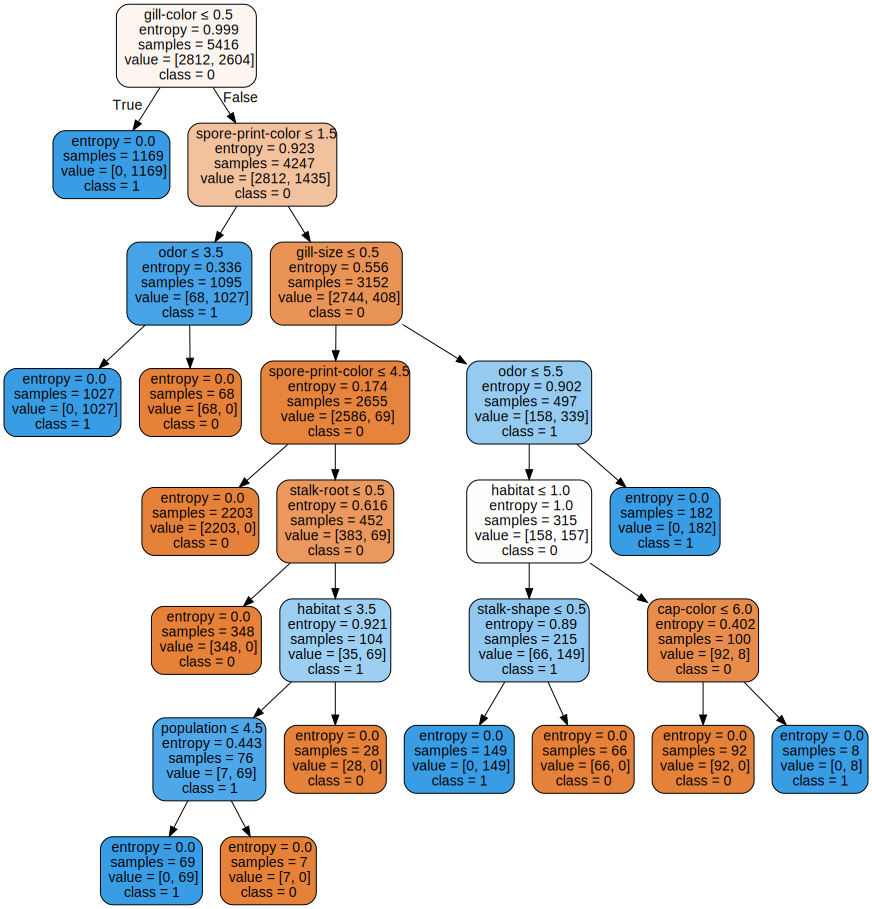

In [11]:
draw_tree("Mushroom gini", mushroom_tree_entropy, mushroom_df.columns[1:], ['0', '1'])

In [ ]:
predicts_gini = mushroom_tree_gini.predict(X_mushroom_test)
predicts_entropy = mushroom_tree_entropy.predict(X_mushroom_test)

print('Confusion matrix for gini')
print(metrics.confusion_matrix(predicts_gini, Y_mushroom_test))

print('Confusion matrix for entropy')
print(metrics.confusion_matrix(predicts_entropy, Y_mushroom_test))

In [ ]:
metrics.f1_score(predicts_gini, Y_mushroom_test)

In [ ]:
metrics.f1_score(predicts_entropy, Y_mushroom_test)